In [29]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler, KernelCenterer, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA

In [30]:
n_components = 18
gamma = 0.01
n_batches = 100

std = StandardScaler()
pca = PCA(n_components=n_components)
# pca = IncrementalPCA(n_components=n_components)
kpca = KernelPCA(n_components=n_components, kernel='rbf', gamma=gamma, fit_inverse_transform = True)

In [31]:
df = pd.read_csv('/home/hugo/projetos-doutorado/mimo_emb_fts/data/energydata_complete.csv', sep=',')
data = df.drop(labels=['date','rv1','rv2'], axis=1)
data = data.loc[0:1000]
data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.890000,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.20,48.900000,17.033333,45.53,6.600000,733.500000,92.0,7.000000,63.000000,5.300000
1,60,30,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.20,48.863333,17.066667,45.56,6.483333,733.600000,92.0,6.666667,59.166667,5.200000
2,50,30,19.890000,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.20,48.730000,17.000000,45.50,6.366667,733.700000,92.0,6.333333,55.333333,5.100000
3,50,40,19.890000,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.10,48.590000,17.000000,45.40,6.250000,733.800000,92.0,6.000000,51.500000,5.000000
4,60,40,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.10,48.590000,17.000000,45.40,6.133333,733.900000,92.0,5.666667,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,50,0,19.290000,41.400000,18.2,41.500000,19.70,40.700000,18.890000,38.290000,...,19.65,42.172500,17.200000,37.79,-0.400000,757.000000,67.0,3.000000,29.000000,-5.800000
997,30,0,19.356667,41.400000,18.2,41.400000,19.70,40.700000,18.890000,38.290000,...,19.60,42.090000,17.200000,37.79,-0.416667,756.966667,67.5,2.833333,30.833333,-5.733333
998,20,0,19.290000,41.400000,18.2,41.400000,19.70,40.663333,18.856667,38.363333,...,19.60,42.000000,17.200000,37.79,-0.433333,756.933333,68.0,2.666667,32.666667,-5.666667
999,30,0,19.290000,41.400000,18.2,41.400000,19.70,40.663333,18.790000,38.290000,...,19.60,41.933333,17.200000,37.79,-0.450000,756.900000,68.5,2.500000,34.500000,-5.600000


In [32]:
len(data.index)

1001

In [33]:
std_data = std.fit_transform(data)

In [34]:
pca_data = pca.fit_transform(std_data)

# for batch in np.array_split(std_data, n_batches):
#     pca.fit(batch)
# pca_data = pca.transform(std_data)

In [35]:
inv_pca_data = pca.inverse_transform(pca_data)

# inv_pca_data = np.dot(
#     pca_data / np.sqrt(len(std_data)-1) * pca.singular_values_,
#     pca.components_
# ) + pca.mean_


# singular_values = 1. / np.sqrt((pca.components_ ** 2).sum(axis=1) / len(std_data))
# inv_pca_data = np.dot(pca_data, singular_values[:, np.newaxis] ** 2 *
#                                           pca.components_ / len(std_data)) + pca.mean_


inv_pca_data = std.inverse_transform(inv_pca_data)

In [36]:
inv_data = pd.DataFrame(inv_pca_data,columns=list(data.columns))

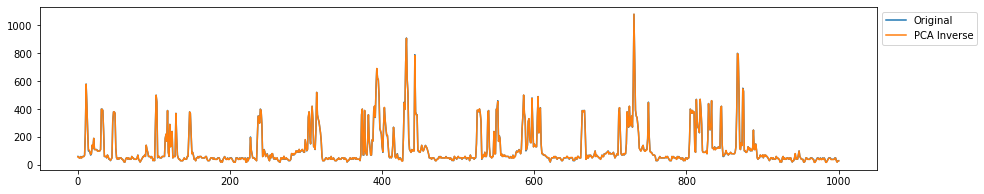

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 3])
ax.plot(data['Appliances'], label='Original')
ax.plot(inv_data['Appliances'], label='PCA Inverse')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
plt.show()

In [38]:
inv_data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,58.072554,29.894207,19.870309,47.650133,19.193002,44.749393,19.711457,44.735636,19.168319,46.574318,...,18.169268,48.089660,16.882764,46.536638,6.352680,735.992633,91.144289,7.087489,62.810793,4.992302
1,58.014426,29.962799,19.933036,46.912036,19.240230,44.556008,19.686001,44.805585,19.161017,46.667519,...,18.162390,48.050579,16.906789,46.659220,6.222775,735.710842,91.194386,6.671454,58.963194,4.860921
2,48.257723,29.901603,19.903327,46.491201,19.213517,44.468139,19.703853,44.943200,19.079543,46.600754,...,18.170597,47.932521,16.859363,46.438377,6.046556,735.679109,91.367442,6.371802,55.126762,4.715209
3,48.113823,39.729527,19.855471,46.226679,19.156283,44.433133,19.721423,45.000008,19.049857,46.613950,...,18.065395,47.510516,16.868448,46.224167,5.887049,735.878894,91.506898,6.101455,51.281822,4.591768
4,58.460111,39.678601,19.831379,46.352705,19.120361,44.523027,19.746548,44.978788,19.043206,46.524425,...,18.104421,47.469640,16.883492,46.122237,5.822852,736.105795,91.498658,5.812313,47.489082,4.534669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,48.536377,0.226597,19.500013,41.556924,18.132461,41.195752,19.662122,40.831345,18.807893,37.788086,...,19.536544,42.505927,17.225422,37.733516,0.281722,755.965671,66.762554,2.851161,29.129566,-5.126349
997,28.589592,0.232429,19.520079,41.512648,18.163718,41.147981,19.665874,40.828223,18.809255,37.837241,...,19.518918,42.433150,17.228959,37.731945,0.258499,756.014268,67.208781,2.703341,30.964427,-5.080572
998,18.590712,0.266165,19.492323,41.531284,18.145737,41.126191,19.659720,40.802132,18.777788,37.888818,...,19.528597,42.390748,17.225226,37.771687,0.241004,756.009128,67.671448,2.526446,32.793199,-5.026866
999,28.351847,0.259702,19.475120,41.539868,18.140534,41.089748,19.654537,40.819753,18.720354,37.921931,...,19.539452,42.311985,17.222253,37.801400,0.199136,756.117175,68.124567,2.381979,34.603235,-4.997955


In [39]:
std_data = std.fit_transform(data)

In [40]:
kpca_data = kpca.fit_transform(std_data)

In [41]:
inv_kpca_data = kpca.inverse_transform(kpca_data)
inv_kpca_data = std.inverse_transform(inv_kpca_data)

In [42]:
kinv_data = pd.DataFrame(inv_kpca_data,columns=list(data.columns))

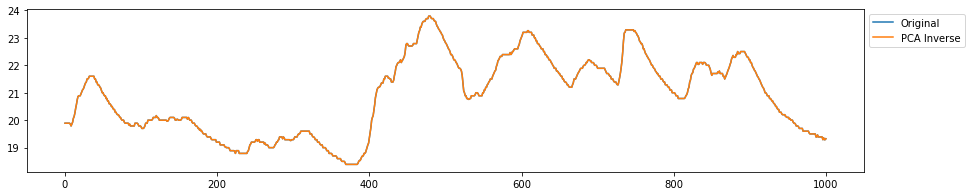

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 3])
ax.plot(data['T1'], label='Original')
ax.plot(kinv_data['T1'], label='PCA Inverse')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
plt.show()

In [44]:
kinv_data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60.0,3.000000e+01,19.890000,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.20,48.900000,17.033333,45.53,6.600000,733.500000,92.0,7.000000,63.000000,5.300000
1,60.0,3.000000e+01,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.20,48.863333,17.066667,45.56,6.483333,733.600000,92.0,6.666667,59.166667,5.200000
2,50.0,3.000000e+01,19.890000,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.20,48.730000,17.000000,45.50,6.366667,733.700000,92.0,6.333333,55.333333,5.100000
3,50.0,4.000000e+01,19.890000,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.10,48.590000,17.000000,45.40,6.250000,733.800000,92.0,6.000000,51.500000,5.000000
4,60.0,4.000000e+01,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.10,48.590000,17.000000,45.40,6.133333,733.900000,92.0,5.666667,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,50.0,2.051692e-13,19.290000,41.400000,18.2,41.500000,19.70,40.700000,18.890000,38.290000,...,19.65,42.172500,17.200000,37.79,-0.400000,757.000000,67.0,3.000000,29.000000,-5.800000
997,30.0,6.217249e-14,19.356667,41.400000,18.2,41.400000,19.70,40.700000,18.890000,38.290000,...,19.60,42.090000,17.200000,37.79,-0.416667,756.966667,67.5,2.833333,30.833333,-5.733333
998,20.0,7.078782e-13,19.290000,41.400000,18.2,41.400000,19.70,40.663333,18.856667,38.363333,...,19.60,42.000000,17.200000,37.79,-0.433333,756.933333,68.0,2.666667,32.666667,-5.666667
999,30.0,-1.536549e-13,19.290000,41.400000,18.2,41.400000,19.70,40.663333,18.790000,38.290000,...,19.60,41.933333,17.200000,37.79,-0.450000,756.900000,68.5,2.500000,34.500000,-5.600000


In [45]:
inv_kpca_pca_data = kpca.inverse_transform(pca_data)
inv_kpca_pca_data = std.inverse_transform(inv_kpca_pca_data)

In [46]:
k_pca_inv_data = pd.DataFrame(inv_kpca_pca_data,columns=list(data.columns))

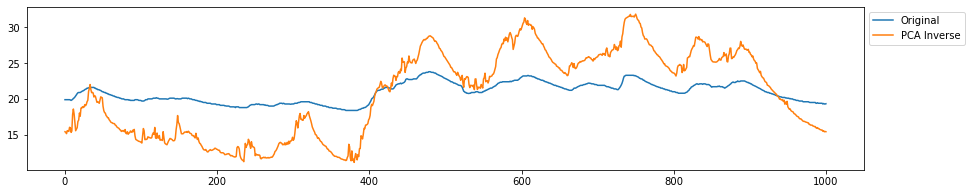

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 3])
ax.plot(data['T1'], label='Original')
ax.plot(k_pca_inv_data['T1'], label='PCA Inverse')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
plt.show()

In [48]:
k_pca_inv_data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,254.267357,54.017371,15.419144,58.914280,16.061333,54.068578,17.464573,52.990550,15.986574,57.532634,...,12.603605,59.333647,15.202728,57.885152,23.042470,685.040657,91.415048,16.747335,85.905209,21.427319
1,226.254178,53.708578,15.357587,58.442196,16.009245,54.444576,17.380234,53.223256,16.028428,58.301107,...,12.509765,59.723796,15.185109,58.004815,22.911229,684.119247,92.541447,16.424788,81.458349,21.514439
2,183.878930,53.367614,15.154446,58.713137,15.775683,55.037008,17.207519,53.557719,15.919911,58.335961,...,12.399689,59.752197,15.044170,57.677294,22.547140,682.812657,92.941509,15.977939,77.450273,21.257663
3,157.005331,67.276438,15.572911,58.683715,16.061988,55.255498,17.132296,53.038238,16.390337,58.180303,...,12.611765,58.831299,15.138337,56.331431,21.861663,682.187286,92.576576,15.037595,72.582866,20.535282
4,144.079695,66.463918,15.529458,59.485949,15.976353,55.746004,17.053891,53.198764,16.580714,58.098720,...,12.704268,59.114602,15.138956,56.119370,21.554138,681.515250,93.232568,14.288286,66.802076,20.367288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,166.077348,-10.987785,15.483068,36.456766,13.006685,38.028142,18.058933,31.912015,19.349800,23.155022,...,22.239227,28.383552,17.523260,22.161147,-11.479209,777.791755,39.732262,-4.879752,9.942264,-21.236704
997,151.061553,-10.608324,15.541733,36.142891,13.016481,37.630077,18.077213,31.745808,19.320819,23.048264,...,22.188350,28.271143,17.546361,22.369155,-11.461151,778.086504,40.573155,-4.983325,13.233631,-21.087713
998,145.685331,-10.058209,15.417807,35.961473,12.968475,37.460048,18.065909,31.619793,19.254403,23.068028,...,22.194866,28.219169,17.563334,22.585517,-11.326352,778.153905,40.938705,-5.078999,16.120438,-20.904107
999,158.836597,-9.544835,15.449273,35.769412,12.991798,37.251688,18.110492,31.532540,19.197274,22.975177,...,22.252447,28.103089,17.599511,22.709341,-11.065547,778.209822,40.186496,-5.133889,18.714161,-20.787824


In [49]:
pca_loss = np.sum((data - k_pca_inv_data) ** 2, axis=1).mean()

pca_loss

38799.92343457161

In [50]:
pca_loss = np.sum((data - inv_data) ** 2, axis=1).mean()
pca_loss

4.6731013113588755

In [51]:
kpca_loss = np.sum((data - kinv_data) ** 2, axis=1).mean()
kpca_loss

1.2650349954151699e-23

In [27]:
"""  MSE Error """
mse = (np.mean((data - inv_data)**2))
mse

Appliances     17106.387598
lights           101.893179
T1                 1.364529
RH_1               3.824122
T2                 1.547642
RH_2               2.732848
T3                 0.525086
RH_3               1.627455
T4                 0.608404
RH_4               2.465092
T5                 0.766804
RH_5              72.878361
T6                 4.038524
RH_6              82.730491
T7                 0.233826
RH_7               5.237447
T8                 0.347960
RH_8               6.328332
T9                 0.073510
RH_9               5.412317
T_out              3.558119
Press_mm_hg       20.891797
RH_out            70.468259
Windspeed          3.404847
Visibility        84.492147
Tdewpoint          2.844227
dtype: float64

In [28]:
"""  MSE Error """
mse = round((np.mean((data - kinv_data)**2)),22)
mse

Appliances     0.0
lights         0.0
T1             0.0
RH_1           0.0
T2             0.0
RH_2           0.0
T3             0.0
RH_3           0.0
T4             0.0
RH_4           0.0
T5             0.0
RH_5           0.0
T6             0.0
RH_6           0.0
T7             0.0
RH_7           0.0
T8             0.0
RH_8           0.0
T9             0.0
RH_9           0.0
T_out          0.0
Press_mm_hg    0.0
RH_out         0.0
Windspeed      0.0
Visibility     0.0
Tdewpoint      0.0
dtype: float64